<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# web location:
local_csv = 'data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [5]:
# A:

nhl = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [10]:
# A:

nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [12]:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [17]:
nhl['Rank'].value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [6]:
# A:

nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [7]:
#how many times different ranks occur 

nhl['Rank'].value_counts()

#3 is the most frequently occuring class 

3    31
2    30
1    29
Name: Rank, dtype: int64

In [8]:
31/90 #want k nearest neighbors to do better than this, if not then don't even need a model, just guess 3 each time

0.34444444444444444

In [9]:
#Can even change to percent 

nhl['Rank'].value_counts(normalize = True)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [22]:
# A:

nhl_preds = nhl[["PTS", "GF", "GA", "SF", "Rank"]]

In [23]:
nhl_preds.head()

,PTS,GF,GA,SF,Rank
0,121,115,73,1112,1
1,117,94,72,1143,1
2,113,90,68,1065,1
3,112,104,83,1186,1
4,111,86,74,1078,1


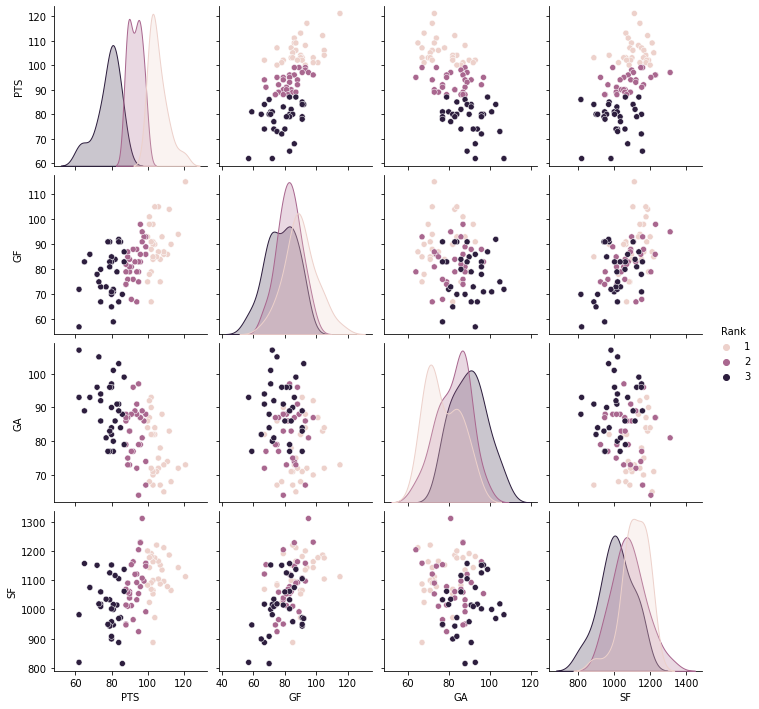

In [24]:
sns.pairplot(nhl_preds, hue = 'Rank')

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [35]:
# A:

X_train, X_test, y_train, y_test = train_test_split(nhl_preds.drop('Rank', axis = 1), nhl_preds['Rank'], 
                                                    random_state = 42)

In [36]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

In [37]:
knn.score(X_train, y_train)

1.0

In [38]:
knn.score(X_test, y_test)

0.7391304347826086

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A:

#Better than baseline 

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [46]:
# A:

X_train, X_test, y_train, y_test = train_test_split(nhl_preds.drop('Rank', axis = 1), nhl_preds['Rank'],
                                                    train_size = .5,
                                                    random_state = 42)

In [47]:
knn_fifty = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

In [48]:
knn_fifty.score(X_train, y_train)

1.0

In [49]:
knn_fifty.score(X_test, y_test)

0.5555555555555556

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [43]:
# A:

len(y_test)

45

In [55]:
knn_rows = KNeighborsClassifier(n_neighbors = 45).fit(X_train, y_train)

In [56]:
knn_rows.score(X_train, y_train)

0.37777777777777777

In [57]:
knn_rows.score(X_test, y_test) #do worse than the baseline 

0.3111111111111111

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [64]:
import warnings

In [65]:
warnings.filterwarnings('ignore')

In [75]:
# A:

scores = [] #list to track our scores 
for n in range (1, len(y_train)):
    knn = KNeighborsClassifier(n_neighbors = n) #creat KNN with n neighbors (1 - 37)
    score = cross_val_score(knn, X_train, y_train).mean() #cross validate 
    scores.append(score)

In [76]:
scores

[0.6888888888888889,
 0.7111111111111111,
 0.6888888888888889,
 0.6,
 0.6444444444444445,
 0.5777777777777777,
 0.6888888888888889,
 0.5777777777777777,
 0.5777777777777777,
 0.5555555555555556,
 0.5333333333333334,
 0.5777777777777777,
 0.5555555555555556,
 0.5777777777777778,
 0.5555555555555556,
 0.5555555555555556,
 0.5777777777777778,
 0.5333333333333334,
 0.5777777777777778,
 0.5777777777777778,
 0.5777777777777778,
 0.5555555555555556,
 0.5333333333333334,
 0.48888888888888893,
 0.48888888888888893,
 0.37777777777777777,
 0.33333333333333337,
 0.4444444444444445,
 0.4222222222222222,
 0.42222222222222233,
 0.42222222222222217,
 0.4444444444444445,
 0.37777777777777777,
 0.42222222222222217,
 0.4,
 0.37777777777777777,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

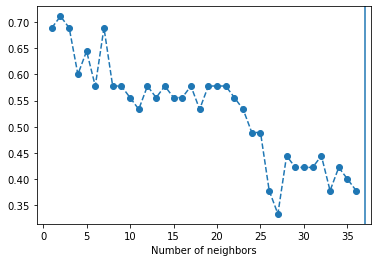

In [78]:
plt.plot(range(1, len(y_train)), scores, '--o')
plt.xlabel('Number of neighbors') 
plt.plot(np.argmax(scores) + 1, scores[np.argmax(scores)], 'ro')
plt.axvline(np.argmax(scores) + 1)

In [72]:
np.argmax(scores)

1

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:



### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [73]:
# A:

sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)